In [1171]:
import pandas as pd
import seaborn as sns

In [1172]:
raw_df = pd.read_csv('../data/raw/raw_listings2.csv', index_col=0)
print(len(raw_df))

51192


In [1173]:
raw_df.head()

,style,living_area,lot_dimensions,bedrooms,bathrooms,levels,location,listing_date,year_of_construction,municipal_eval,price
0,2 storey,1191.3,4076.29,3.0,1.0,2.0,Beauport,202012.0,2004.0,256000.0,332500.0
0,Open area,1261.0,9500.00,2.0,1.0,1.0,Deschambault,202112.0,1957.0,150500.0,265000.0
0,NaN,1645.0,1360.00,3.0,1.0,3.0,Mercier,202111.0,2006.0,479400.0,612000.0
0,Link,2024.0,17000.00,4.0,3.0,1.0,Stoneham,202112.0,2019.0,NaN,526500.0
0,Waterfront,1469.0,16970.00,4.0,2.0,2.0,Trois-Rivières,202111.0,1925.0,NaN,NaN


In [1174]:
processed_df = raw_df.copy()

In [1175]:
print(len(processed_df))

51192


## Style

In [1176]:
processed_df['style'].value_counts(dropna=False).iloc[0:10]

NaN                 11417
Open area            9583
2 storey             9179
Detached             5723
New construction     1578
Side split           1505
Rural                1455
Waterfront           1166
Cathedral roof        987
Canadian              963
Name: style, dtype: int64

In [1177]:
processed_df['style'] = processed_df['style'].fillna('Unknown')
styles = processed_df['style'].value_counts()
processed_df = processed_df[processed_df['style'].isin(styles.keys())]

In [1178]:
print(len(processed_df))

51192


## Living Area

In [1179]:
processed_df['living_area'].value_counts(dropna=False).iloc[0:5]

NaN       1266
1200.0    1171
960.0      627
1000.0     605
1120.0     549
Name: living_area, dtype: int64

In [1180]:
mean_living_area = processed_df['living_area'].dropna().mean()
processed_df['living_area'] = processed_df['living_area'].fillna(mean_living_area)

c:\Users\simon\Documents\GitHub\quebec-real-estate\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='living_area', ylabel='Density'>

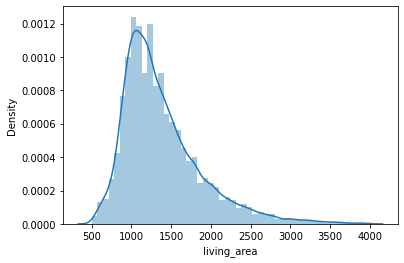

In [1181]:
processed_df = processed_df[processed_df['living_area'] > 500]
processed_df = processed_df[processed_df['living_area'] < 4000]
processed_df['living_area'] = processed_df['living_area'].astype(int)

sns.distplot(processed_df['living_area'])

In [1182]:
print(len(processed_df))

49474


## Lot Dimensions

In [1183]:
processed_df['lot_dimensions'].value_counts(dropna=False).iloc[0:5]

6000.0     936
5000.0     721
NaN        419
7000.0     373
10000.0    333
Name: lot_dimensions, dtype: int64

In [1184]:
mean_lot_dimensions = processed_df['lot_dimensions'].dropna().mean()
processed_df['lot_dimensions'] = processed_df['lot_dimensions'].fillna(mean_living_area)

c:\Users\simon\Documents\GitHub\quebec-real-estate\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='lot_dimensions', ylabel='Density'>

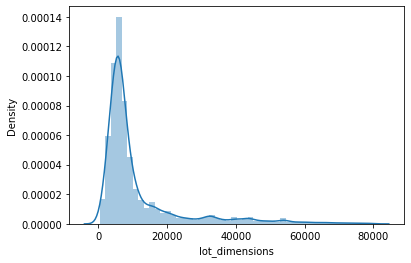

In [1185]:
processed_df = processed_df[processed_df['lot_dimensions'] > 500]
processed_df = processed_df[processed_df['lot_dimensions'] < 80000]
processed_df['lot_dimensions'] = processed_df['lot_dimensions'].astype(int)

sns.distplot(processed_df['lot_dimensions'])

In [1186]:
print(len(processed_df))

47744


## Bedrooms, Bathrooms & Levels

In [1187]:
processed_df['bedrooms'].value_counts(dropna=False)

3.0     20952
4.0     15262
2.0      6069
5.0      4312
6.0       662
1.0       310
7.0       117
8.0        33
9.0        11
NaN         9
10.0        4
11.0        2
15.0        1
Name: bedrooms, dtype: int64

In [1188]:
processed_df['bathrooms'].value_counts(dropna=False)

2.0    25107
1.0    20699
3.0     1819
4.0       85
5.0       18
NaN        9
6.0        4
8.0        2
7.0        1
Name: bathrooms, dtype: int64

In [1189]:
processed_df['levels'].value_counts(dropna=False)

1.0       23516
2.0       22555
3.0        1033
NaN         563
4.0          70
5.0           4
11.0          1
6.0           1
1816.0        1
Name: levels, dtype: int64

In [1190]:
processed_df = processed_df[processed_df['bedrooms'] < 9]
processed_df = processed_df[processed_df['bathrooms'] < 6]
processed_df = processed_df[processed_df['levels'] < 4]

processed_df['bedrooms'] = processed_df['bedrooms'].astype(int)
processed_df['bathrooms'] = processed_df['bathrooms'].astype(int)
processed_df['levels'] = processed_df['levels'].astype(int)

In [1191]:
print(len(processed_df))

47065


## Listing Date

In [1192]:
processed_df['listing_date'].value_counts(dropna=False).iloc[0:5]

201907.0    3884
202006.0    1167
202005.0    1114
202009.0    1091
202002.0    1055
Name: listing_date, dtype: int64

In [1193]:
processed_df['listing_date'] = pd.to_datetime(processed_df['listing_date'], format='%Y%m')

## Year of Construction

In [1194]:
processed_df['year_of_construction'].value_counts(dropna=False).iloc[0:5]

NaN       3984
2010.0    1497
2012.0    1373
2011.0    1328
2008.0    1183
Name: year_of_construction, dtype: int64

In [1195]:
mean_year_of_constructions = processed_df['year_of_construction'].dropna().mean()
processed_df['year_of_construction'] = processed_df['year_of_construction'].fillna(mean_living_area)

In [1196]:
years = processed_df['year_of_construction'].value_counts()
processed_df = processed_df[processed_df['year_of_construction'].isin(years.keys())]
processed_df['year_of_construction'] = processed_df['year_of_construction'].astype(int)

In [1197]:
print(len(processed_df))

47065


## Municipal Evaluation

In [1198]:
processed_df['municipal_eval'].value_counts(dropna=False).iloc[0:5]

NaN         23520
236000.0       58
240000.0       57
215000.0       52
225000.0       50
Name: municipal_eval, dtype: int64

In [1199]:
drop_municipal_eval = True

In [1200]:
if drop_municipal_eval:
    processed_df = processed_df.drop(['municipal_eval'], axis=1)
else:
    processed_df = processed_df[processed_df['municipal_eval'] > 2000]
    processed_df = processed_df[processed_df['municipal_eval'] < 1000000]
    processed_df['municipal_eval'] = processed_df['municipal_eval'].astype(int)

    sns.distplot(processed_df['municipal_eval'])

## Price

In [1201]:
processed_df['price'].value_counts(dropna=False).iloc[0:5]

NaN         10026
250000.0      431
300000.0      393
260000.0      377
225000.0      373
Name: price, dtype: int64

c:\Users\simon\Documents\GitHub\quebec-real-estate\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

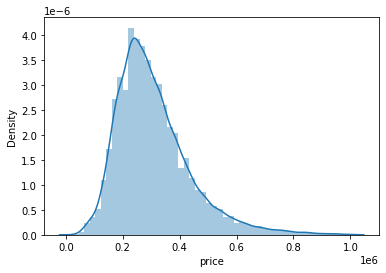

In [1202]:
processed_df = processed_df[processed_df['price'] > 2000]
processed_df = processed_df[processed_df['price'] < 1000000]
processed_df['price'] = processed_df['price'].astype(int)

sns.distplot(processed_df['price'])

In [1203]:
processed_df.head()

,style,living_area,lot_dimensions,bedrooms,bathrooms,levels,location,listing_date,year_of_construction,price
0,2 storey,1191,4076,3,1,2,Beauport,2020-12-01,2004,332500
0,Open area,1261,9500,2,1,1,Deschambault,2021-12-01,1957,265000
0,Unknown,1645,1360,3,1,3,Mercier,2021-11-01,2006,612000
0,Link,2024,17000,4,3,1,Stoneham,2021-12-01,2019,526500
0,2 storey,2400,4471,4,2,2,Gatineau,2021-12-01,1989,360000


## Location

In [1204]:
processed_df['location'].value_counts(dropna=False).iloc[190:201]

La Pêche                    38
Les Côteaux                 38
St-Mathias-sur-Richelieu    38
Villeray                    37
Louiseville                 37
Roxton Pond                 37
Hébertville                 37
St-Ambroise                 37
St-David-de-Falardeau       36
Waterloo                    36
Morin-Heights               36
Name: location, dtype: int64

In [1205]:
locations = processed_df['location'].value_counts()
processed_df = processed_df[processed_df['location'].isin(locations.keys()[0:250])]

In [1206]:
print(len(raw_df))
print(len(processed_df))

51192
32180


In [1207]:
processed_df.to_csv('../data/processed/processed_listings.csv', index=False)